## Load raw data

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np

us_raw_data = pd.read_csv("./data/youtube-trending-video-dataset/US_youtube_trending_data.csv")

In [3]:
us_raw_data.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


## Clean data

1. remove useless columns
2. convert the date type day (yyyy-mm-dd)
3. remove duplicates records, use the max date publishedAt only.
4. calculate rank for each video by day 
5. order rank record pack top 10 rank data
6. group by records by month 
7. calculate rank_count  


In [46]:
 us_clean_data = pd.read_csv("./data/youtube-trending-video-dataset/us_youtube_data_rank10_count_view.csv")
 us_clean_data.head(10)
 
 

,publishedAt,categoryId,category_title,rank_value,rank_count
0,2020-08,1,Film & Animation,1,1
1,2020-08,1,Film & Animation,2,2
2,2020-08,1,Film & Animation,4,1
3,2020-08,1,Film & Animation,5,1
4,2020-08,1,Film & Animation,9,2
5,2020-08,2,Autos & Vehicles,10,2
6,2020-08,10,Music,1,15
7,2020-08,10,Music,2,10
8,2020-08,10,Music,3,7
9,2020-08,10,Music,4,9


## Analysis 
### The most popular Youtube video  during 2020 ~ 2023 in US

In [52]:
a1 = us_clean_data.groupby('category_title').agg({'rank_count': 'sum'}).reset_index()
a1.head(10)


,category_title,rank_count
0,Autos & Vehicles,102
1,Comedy,472
2,Education,279
3,Entertainment,2668
4,Film & Animation,553
5,Gaming,1940
6,Howto & Style,200
7,Music,2730
8,News & Politics,290
9,Nonprofits & Activism,6


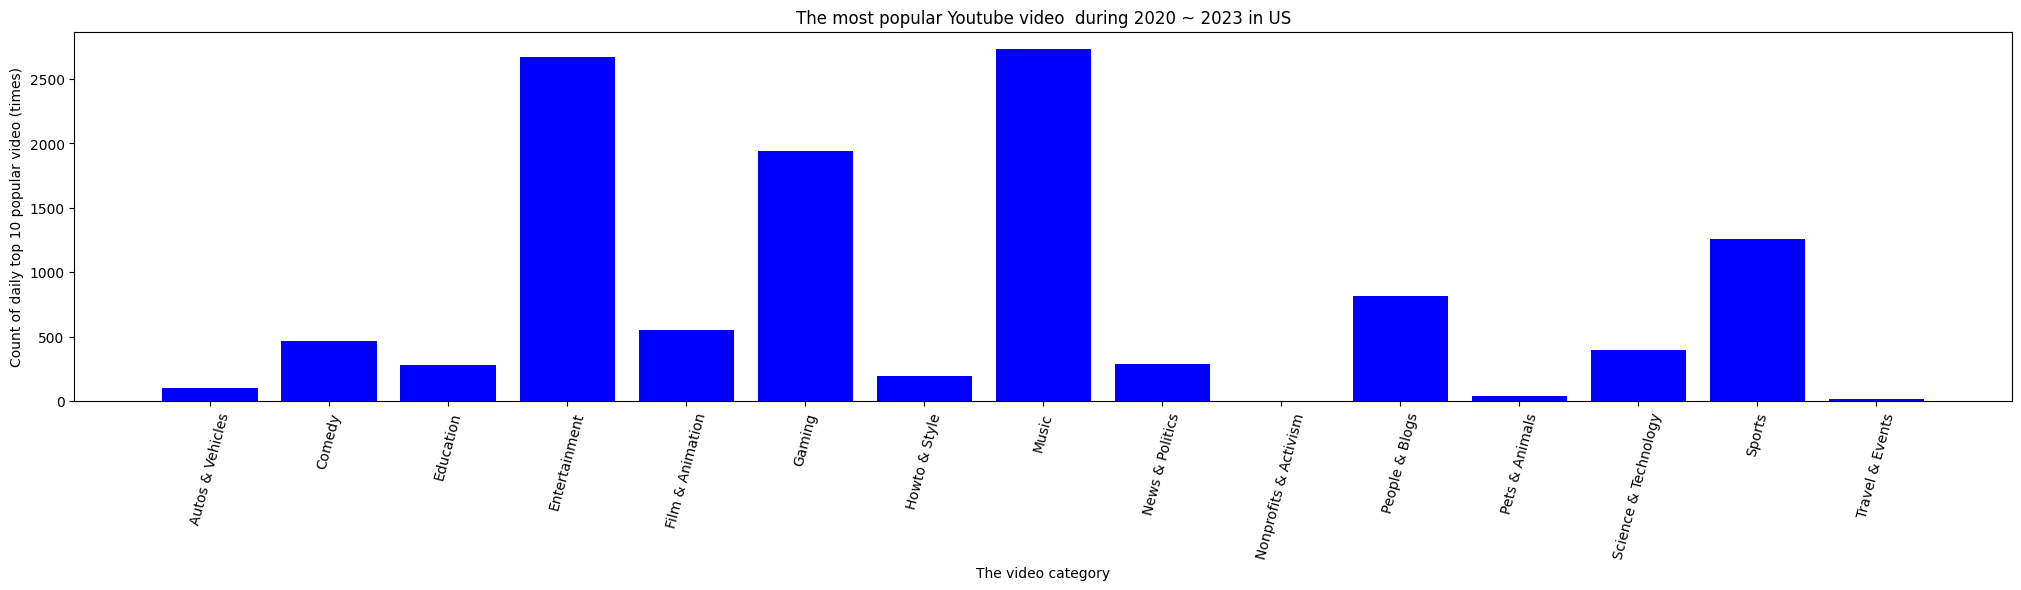

In [51]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.figure().set_figwidth(25)
plt.bar(a1['category_title'], a1['rank_count'], color='blue')
plt.xticks(rotation=75)
plt.title("The most popular Youtube video  during 2020 ~ 2023 in US") 
plt.xlabel("The video category")
plt.ylabel("Count of daily top 10 popular video (times)")
#plt.gca().legend(('Rent price'))
plt.show()

### The most popular Youtube video monthly in US

In [56]:
a2 = us_clean_data.groupby(['publishedAt','category_title','categoryId']).agg({'rank_count': 'sum'}).reset_index()
a2.head(10)

,publishedAt,category_title,categoryId,rank_count
0,2020-08,Autos & Vehicles,2,2
1,2020-08,Comedy,23,11
2,2020-08,Education,27,4
3,2020-08,Entertainment,24,74
4,2020-08,Film & Animation,1,7
5,2020-08,Gaming,20,25
6,2020-08,Howto & Style,26,6
7,2020-08,Music,10,76
8,2020-08,News & Politics,25,10
9,2020-08,People & Blogs,22,25


In [57]:
Music = a2.query('categoryId == 10')
Entertainment = a2.query('categoryId == 24')
Gaming = a2.query('categoryId == 20')
Sports = a2.query('categoryId == 17')

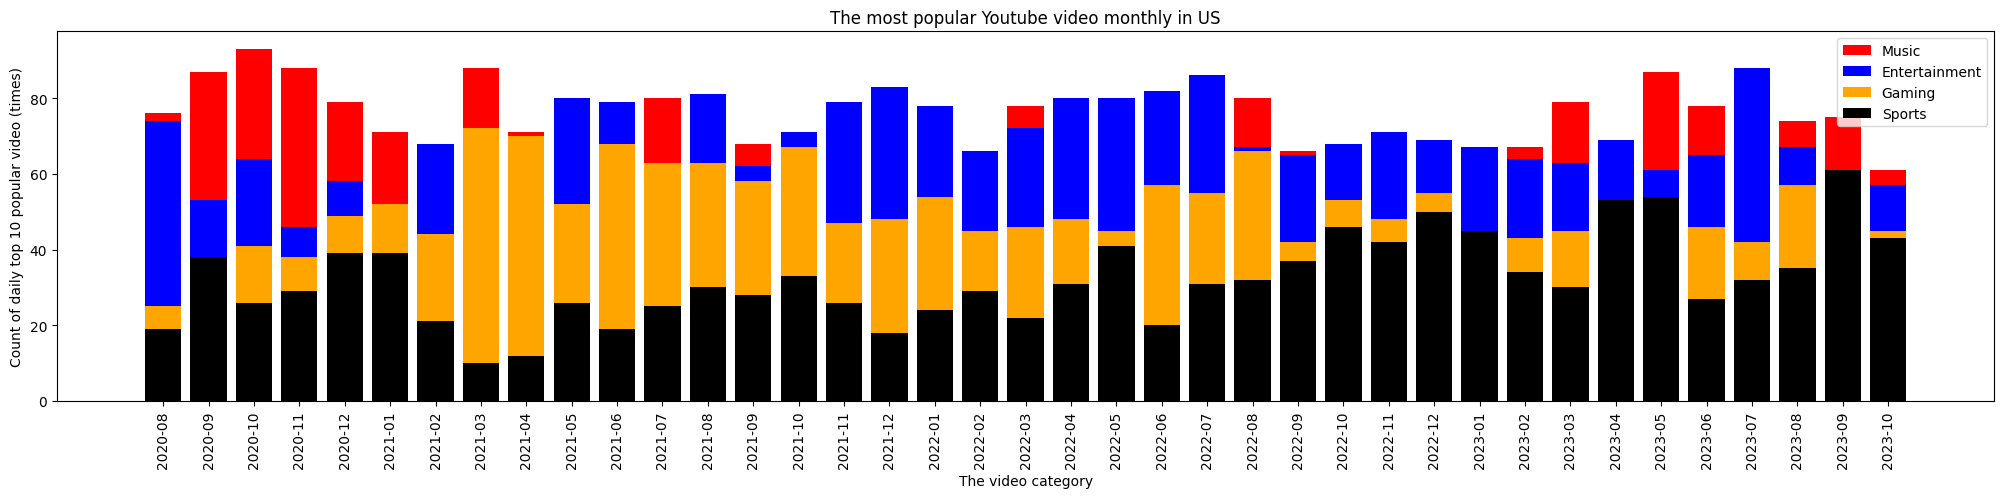

In [62]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.figure().set_figwidth(25)
plt.bar(Music['publishedAt'], Music['rank_count'], color='red')
plt.bar(Entertainment['publishedAt'], Entertainment['rank_count'], color='blue')
plt.bar(Gaming['publishedAt'], Gaming['rank_count'], color='orange')
plt.bar(Sports['publishedAt'], Sports['rank_count'], color='black')
plt.xticks(rotation=90)
plt.title("The most popular Youtube video monthly in US") 
plt.xlabel("The video category")
plt.ylabel("Count of daily top 10 popular video (times)")
plt.gca().legend(('Music','Entertainment','Gaming','Sports'))
plt.show()
